In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [7]:
df=pd.read_csv('/content/Salary_Data.csv')

In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
x=df[['YearsExperience']]
y=df['Salary']

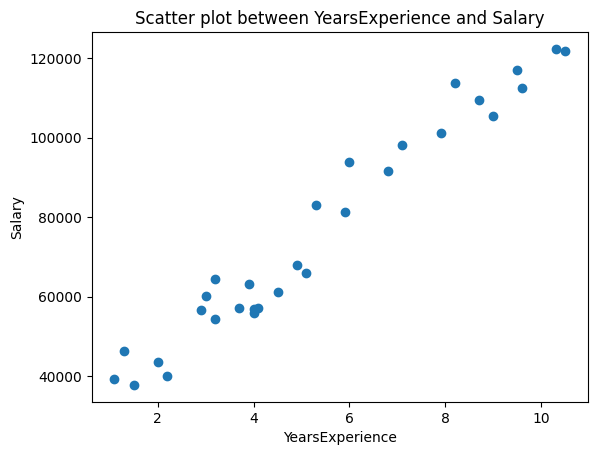

In [24]:
# prompt: plot x and y

plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter plot between YearsExperience and Salary')
plt.show()


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [67]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
pred=model.predict(x_test)

In [69]:
data=pd.DataFrame({'Actual':y_test,'Predicted':pred})
data

,Actual,Predicted
11,55794.0,64374.492624
29,121872.0,124811.926498
23,113812.0,103426.372973
25,105582.0,110864.826373
18,81363.0,82040.819449
10,63218.0,63444.685949
2,37731.0,41129.325749
13,57081.0,65304.299299
26,116969.0,115513.859748


<Axes: >

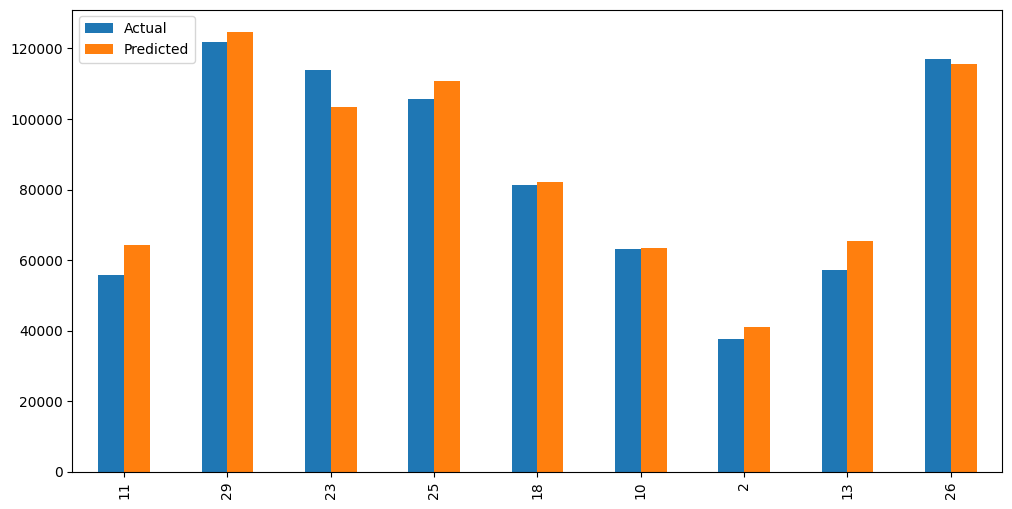

In [70]:
graph=data.head(25)
graph.plot(kind='bar',figsize=(12,6))

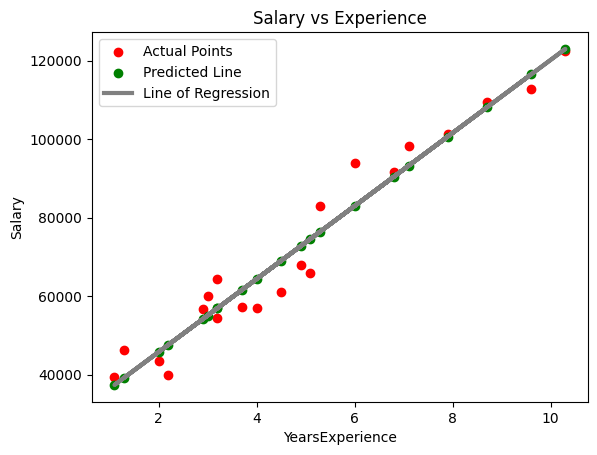

In [80]:
# Draw Line of Regression(Training Samples)
plt.scatter(x_train,y_train,color='red',label='Actual Points')
plt.scatter(x_train,model.predict(x_train),color='green',label='Predicted Line')
plt.plot(x_train,model.predict(x_train),color='grey',lw=3,label='Line of Regression')
plt.legend()
plt.title('Salary vs Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

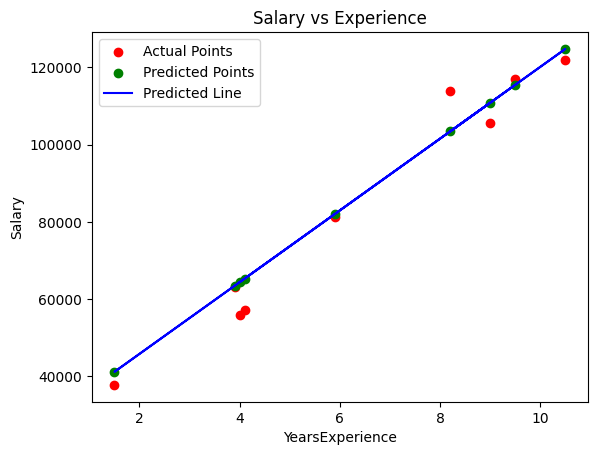

In [81]:
plt.scatter(x_test,y_test,color='red',label='Actual Points')
plt.scatter(x_test,pred,color='green',label='Predicted Points')
plt.plot(x_test,pred,color='blue',label='Predicted Line')
plt.legend()
plt.title('Salary vs Experience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [71]:
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)

In [72]:
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Absolute Error: 4574.460357716664
Mean Squared Error: 33315228.09372838
R-squared: 0.9624024983951907


In [82]:
model.intercept_

27182.225624410756

In [83]:
accuracy=[]
for i in range(501):
  x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.3,random_state=i)
  model_1=LinearRegression()
  model_1.fit(x_train_1,y_train_1)
  pred_1=model_1.predict(x_test_1)
  accuracy.append(r2_score(y_test_1,pred_1))

In [84]:
print(np.max(accuracy))
print(np.argmax(accuracy))

0.9940337412776238
103


In [89]:
def salary():
  exp=float(input("Enter Work Experience in Years:"))
  salary=model.predict([[exp]])
  print("Salary:",str(round(salary[0],2)))

In [90]:
salary()

Enter Work Experience in Years:13
Salary: 148057.09


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
import joblib
joblib.dump(model,'salary_model.pkl')

['salary_model.pkl']

In [92]:
mymodel=joblib.load('salary_model.pkl')

In [94]:
round(mymodel.predict([[5]])[0],2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73672.56